# Eingen-Entropy

In [1]:
import time
import collections
import numpy as np
import pandas as pd
import datapackage
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import yfinance as yf
import seaborn as sb
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
SCRIPT_DIR = os.path.dirname(os.path.abspath(""))
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [40]:
def create_neg_network(graph, treshold = 0.5):
    '''

    Parameters
    ----------
    graph : networkx.classes.graph.Graph
        graph.
    treshold : float, optional
        treshold. The default is 0.5

    Returns
    -------
    h_graph : networkx.classes.graph.Graph
        splitted graph.

    '''
    h_graph = graph.copy()
    # Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight  in list(graph.edges(graph, data = True)):
        for weight in weight.values():
            # if we only want to see the negative correlations we
            # then we delete the edges with weight greater than - treshold
            if weight >= -treshold:
                h_graph.remove_edge(stock1, stock2)
    return h_graph

Create distance matrix over 40 days using 20 times windows

In [4]:
start = time.time()
STOCK = pd.read_csv('data\\stock_code.csv',index_col= False)
ticker = np.array(STOCK['Symbol'])
fps_hist_dict = collections.defaultdict()
dataset_len = len(ticker)
# Collect the data from yahoofinance
if ticker is not None:
        for code in ticker:
            print(f'Start {code}')
            print(f"[{list(ticker).index(code)+ 1}/{dataset_len}] Fetching historic data for {code}")
            fp = yf.Ticker(code)
            fp_hist = fp.history(period='max', auto_adjust = True, interval='1d')
            # auto_adjust = True : Close -> Adj. Close
            if fp_hist.empty:
                print(f"- WARN: No history data is available for {code} > It will be skipped")
            else:
                fps_hist_dict[code] = fp_hist
else:
    raise Exception('No data has been loaded')
np.save("data\\dataset_dict.npy", fps_hist_dict)

Start CMCSA
[1/194] Fetching historic data for CMCSA
Start DIS
[2/194] Fetching historic data for DIS
Start F
[3/194] Fetching historic data for F
Start GPC
[4/194] Fetching historic data for GPC
Start GPS
[5/194] Fetching historic data for GPS
Start GT
[6/194] Fetching historic data for GT
Start HAS
[7/194] Fetching historic data for HAS
Start HD
[8/194] Fetching historic data for HD
Start HRB
[9/194] Fetching historic data for HRB
Start IPG
[10/194] Fetching historic data for IPG
Start JCP
[11/194] Fetching historic data for JCP
- JCP: No data found, symbol may be delisted
- WARN: No history data is available for JCP > It will be skipped
Start JWN
[12/194] Fetching historic data for JWN
Start LEG
[13/194] Fetching historic data for LEG
Start LEN
[14/194] Fetching historic data for LEN
Start LOW
[15/194] Fetching historic data for LOW
Start MAT
[16/194] Fetching historic data for MAT
Start MCD
[17/194] Fetching historic data for MCD
Start NKE
[18/194] Fetching historic data for NKE
St

In [5]:
corr_dict = collections.defaultdict(dict)

In [6]:
corr_dict = collections.defaultdict(dict)
for date in pd.date_range(start="1985-01-02",end="2021-12-30", freq='20D'):
    corr_mtx = collections.defaultdict(dict)
    for kr, vr in fps_hist_dict.items():
        try:
            corr_mtx[kr] = daily_return_log(fps_hist_dict[kr]['Close'],date)
        except Exception:
            print(f'{kr} has no data')
        pass
    corr_mtx = pd.DataFrame(corr_mtx)
    corr_mtx = corr_mtx.corr()
    #Evaluate distance matrix from correlation matrix
    dist_corr = corr_mtx.apply(distance_correlation)
    corr_dict[date.strftime('%Y-%m-%d')] = dist_corr

CB has no data
AET has no data
DNB has no data
IR has no data
S has no data
CB has no data
AET has no data
DNB has no data
IR has no data
S has no data
CB has no data
AET has no data
DNB has no data
IR has no data
S has no data
CMCSA has no data
DIS has no data
F has no data
GPC has no data
GPS has no data
GT has no data
HAS has no data
HD has no data
HRB has no data
IPG has no data
JWN has no data
LEG has no data
LEN has no data
LOW has no data
MAT has no data
MCD has no data
NKE has no data
SHW has no data
TGT has no data
VFC has no data
WHR has no data
ADM has no data
CAG has no data
CL has no data
CPB has no data
CVS has no data
GIS has no data
HRL has no data
HSY has no data
K has no data
KMB has no data
KO has no data
KR has no data
MKC has no data
MO has no data
SYY has no data
TAP has no data
TSN has no data
WMT has no data
APA has no data
COP has no data
CVX has no data
HAL has no data
HES has no data
HP has no data
MRO has no data
MUR has no data
NBR has no data
SLB has no da

Delete Empty Dataset

In [170]:
for k in list(corr_dict.keys()):
    if corr_dict[k].empty:
        del corr_dict[k]

Create Graph

In [171]:
def creating_graph (data):
    '''

    Parameters
    ----------
    data : numpy.matrix
        correlation matrix

    Returns
    -------
    graph : networkx.classes.graph.Graph
        graph.

    '''
    stocks = data.index.values
    data = np.asmatrix(data)
    #Crates graph using the data of the correlation matrix
    graph = nx.from_numpy_matrix(data)
    #relabels the nodes to match the  stocks names
    graph = nx.relabel_nodes(graph,lambda x: stocks[x])
    return graph

In [182]:
mykeys = [*corr_dict]
list_graph = collections.defaultdict()
# create a dictionary of graph
for number in range (len(corr_dict)) :
    data_year = corr_dict[mykeys[number]]
    G = creating_graph(data_year)
    #G = create_neg_network(G, treshold = -1)
    list_graph[mykeys[number]] = G
    print(f'Done {number +1 }/{len(corr_dict) }')

Done 1/472
Done 2/472
Done 3/472
Done 4/472
Done 5/472
Done 6/472
Done 7/472
Done 8/472
Done 9/472
Done 10/472
Done 11/472
Done 12/472
Done 13/472
Done 14/472
Done 15/472
Done 16/472
Done 17/472
Done 18/472
Done 19/472
Done 20/472
Done 21/472
Done 22/472
Done 23/472
Done 24/472
Done 25/472
Done 26/472
Done 27/472
Done 28/472
Done 29/472
Done 30/472
Done 31/472
Done 32/472
Done 33/472
Done 34/472
Done 35/472
Done 36/472
Done 37/472
Done 38/472
Done 39/472
Done 40/472
Done 41/472
Done 42/472
Done 43/472
Done 44/472
Done 45/472
Done 46/472
Done 47/472
Done 48/472
Done 49/472
Done 50/472
Done 51/472
Done 52/472
Done 53/472
Done 54/472
Done 55/472
Done 56/472
Done 57/472
Done 58/472
Done 59/472
Done 60/472
Done 61/472
Done 62/472
Done 63/472
Done 64/472
Done 65/472
Done 66/472
Done 67/472
Done 68/472
Done 69/472
Done 70/472
Done 71/472
Done 72/472
Done 73/472
Done 74/472
Done 75/472
Done 76/472
Done 77/472
Done 78/472
Done 79/472
Done 80/472
Done 81/472
Done 82/472
Done 83/472
Done 84/472
D

In [173]:
def eigen_entropy(p):
    return (-p*np.log(p))

In [175]:
def sum_eigen_entropy(G):
    try:
        eigen = nx.eigenvector_centrality(G,weight = 'weight')
        list_eigen.append(eigen)
        total = sum(eigen.values())  #normalize
        H = 0
        for value in list_eigen[1].values():
            H = H + eigen_entropy(value/total)
        return H
    except:
        pass

In [102]:
G = list_graph['1985-01-02']

In [183]:
list_eigen_entropy = []
for keys in list_graph:
    list_eigen_entropy.append(sum_eigen_entropy(list_graph[keys]))

In [186]:
list_graph.keys()

dict_keys(['1985-01-02', '1985-01-22', '1985-02-11', '1985-04-12', '1985-05-02', '1985-05-22', '1985-06-11', '1985-07-01', '1985-08-30', '1985-09-19', '1985-10-09', '1985-10-29', '1985-11-18', '1986-01-17', '1986-02-06', '1986-02-26', '1986-03-18', '1986-04-07', '1986-06-06', '1986-06-26', '1986-07-16', '1986-08-05', '1986-08-25', '1986-10-24', '1986-11-13', '1986-12-03', '1986-12-23', '1987-01-12', '1987-03-13', '1987-04-02', '1987-04-22', '1987-05-12', '1987-06-01', '1987-07-31', '1987-08-20', '1987-09-09', '1987-09-29', '1987-10-19', '1987-12-18', '1988-01-07', '1988-01-27', '1988-02-16', '1988-03-07', '1988-05-06', '1988-05-26', '1988-06-15', '1988-07-05', '1988-07-25', '1988-09-23', '1988-10-13', '1988-11-02', '1988-11-22', '1988-12-12', '1989-02-10', '1989-03-02', '1989-03-22', '1989-04-11', '1989-05-01', '1989-06-30', '1989-07-20', '1989-08-09', '1989-08-29', '1989-09-18', '1989-11-17', '1989-12-07', '1989-12-27', '1990-01-16', '1990-02-05', '1990-04-06', '1990-04-26', '1990-05-

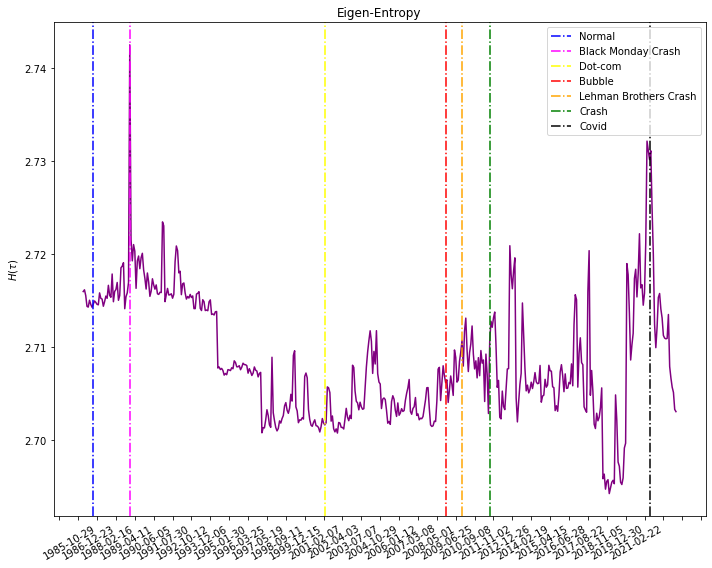

In [190]:
f = plt.figure(1, figsize=(10, 8))
ax = f.add_subplot(1,1,1)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval= 15))
plt.plot(list_graph.keys(), list_eigen_entropy, color = 'purple')
normal = plt.axvline(x = next(x[0] for x in enumerate(list_graph.keys()) if x[1] == '1985-08-30'), 
            color = 'b', label = 'Normal', linestyle = '-.')
black_monday = plt.axvline(x = next(x[0] for x in enumerate(list_graph.keys()) if x[1] == '1987-10-19'), 
            color = 'magenta', label = 'Black Monday Crash' , linestyle = '-.')
dot = plt.axvline(x = next(x[0] for x in enumerate(list_graph.keys()) if x[1] == '2000-01-04'), 
            color = 'yellow', label = 'Dot-com', linestyle = '-.')
bubble = plt.axvline(x = next(x[0] for x in enumerate(list_graph.keys()) if x[1] == '2007-09-04'), 
            color = 'r', label = 'Bubble', linestyle = '-.')
lehman_Crash = plt.axvline(x = next(x[0] for x in enumerate(list_graph.keys()) if x[1] == '2008-09-18'), 
            color = 'orange', label = 'Lehman Brothers Crash', linestyle = '-.')
'2008-09-18'
crash = plt.axvline(x = next(x[0] for x in enumerate(list_graph.keys()) if x[1] == '2010-05-11'), 
            color = 'g', label = 'Crash', linestyle = '-.')
covid = plt.axvline(x = next(x[0] for x in enumerate(list_graph.keys()) if x[1] == '2020-04-28'), 
            color = 'black', label = 'Covid', linestyle = '-.')
plt.gcf().autofmt_xdate()
plt.legend()
plt.title('Eigen-Entropy')
plt.ylabel(r'$H(\tau)$')
plt.savefig("plots\\eigen_entropy_no_trashold.pdf", format="pdf", bbox_inches="tight")
f.tight_layout()
f.set_facecolor('w')